In [1]:
import pandas as pd
import geopandas as gpd
import functions
import numpy as np
import json
import os

pd.set_option('display.max_columns', None)

In [11]:
def haversine(df):
    # Get data as a Nx2 shaped NumPy array
    data = np.array(df[["stop_lat", "stop_lon"]])

    # Convert to radians
    data = np.deg2rad(data)

    # Extract col-1 and 2 as latitudes and longitudes
    lat = data[:,0]
    lng = data[:,1]

    # Elementwise differentiations for lattitudes & longitudes
    diff_lat = lat[:,None] - lat
    diff_lng = lng[:,None] - lng

    # Calculate haversine
    d = np.sin(diff_lat/2)**2 + np.cos(lat[:,None])*np.cos(lat) * np.sin(diff_lng/2)**2
    km = 2 * 6371 * np.arcsin(np.sqrt(d))

    return km

def get_distances(route_df):
    matrix = haversine(route_df).tolist()
    max_distance = max(list(map(max, matrix)))
    idx = []
    for i in range(len(matrix)):
        if max_distance in matrix[i]:
            idx.append(i)

    return idx, matrix

def write_to_file():
    with open("by_directions.json") as f:
        data = json.load(f)

    for route_num in data.keys():
        print(route_num)


        # if len(indices) > len(direction_names):
        #     print("is a loop = True")
        #     route_df[direction_names[0] + " (km)"] = matrix[indices[0]]
        # else:
        #     for i in range(len(indices)):
        #         print("not a loop, i = ", i)
        #         route_df[direction_names[i] + " (km)"] = matrix[indices[i]]
        for direction in data[route_num].keys():
            route_df = functions.get_stop_info_of_route(int(route_num))
            indices, matrix = get_distances(route_df)

            filename = "route" + route_num + "_" + direction + ".csv"
            filepath = os.path.join("routes", filename)





            route_df.to_csv(path_or_buf=filepath, index=False)

        # debug
        # if route_num == "2":
        #     return route_df

        print("successfully write route {} to {}".format(route_num, filename))

# write_to_file()

In [15]:
with open("by_directions.json") as f:
    data = json.load(f)

# for route in data.keys():
#     print(route)
#     for direction in data[route].keys():
#         print(direction)

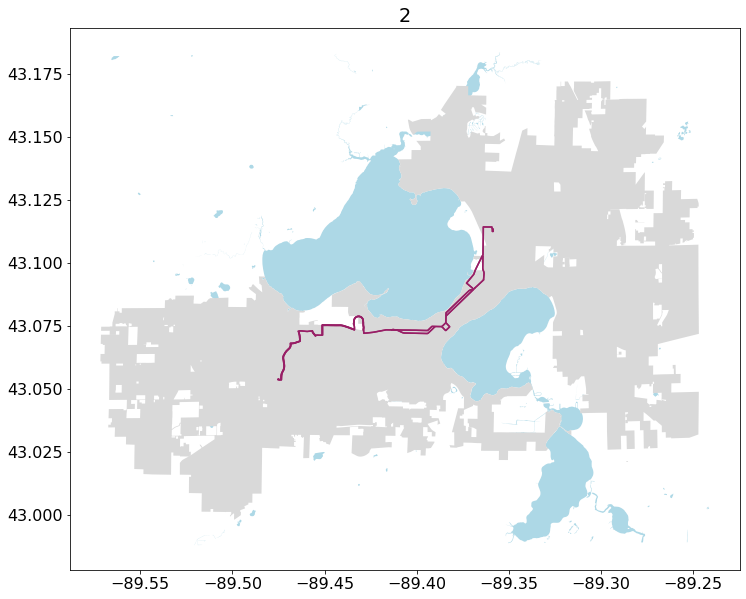

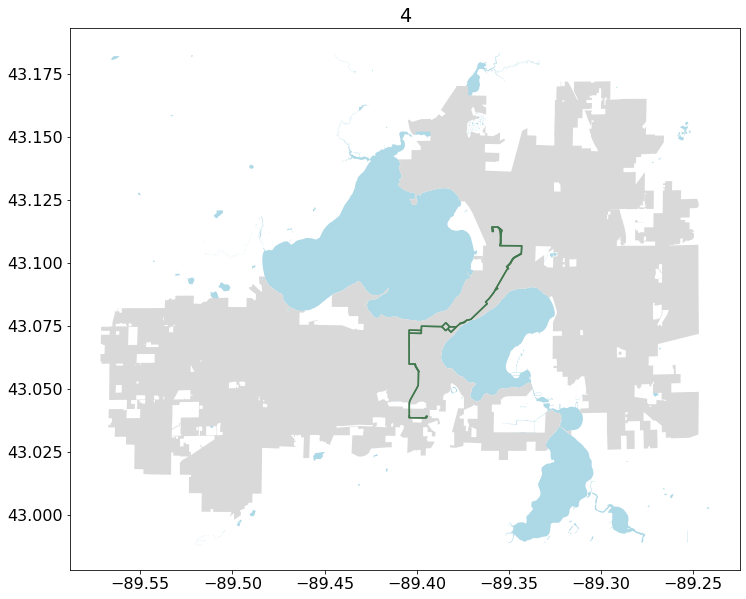

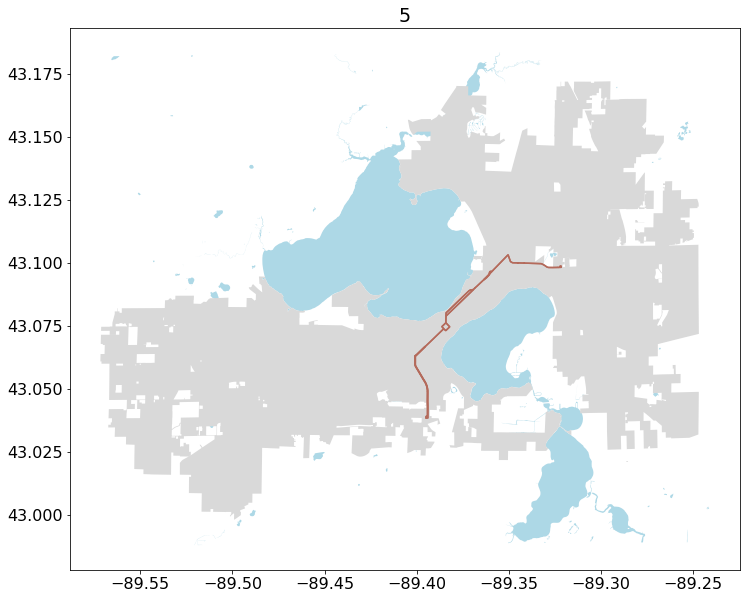

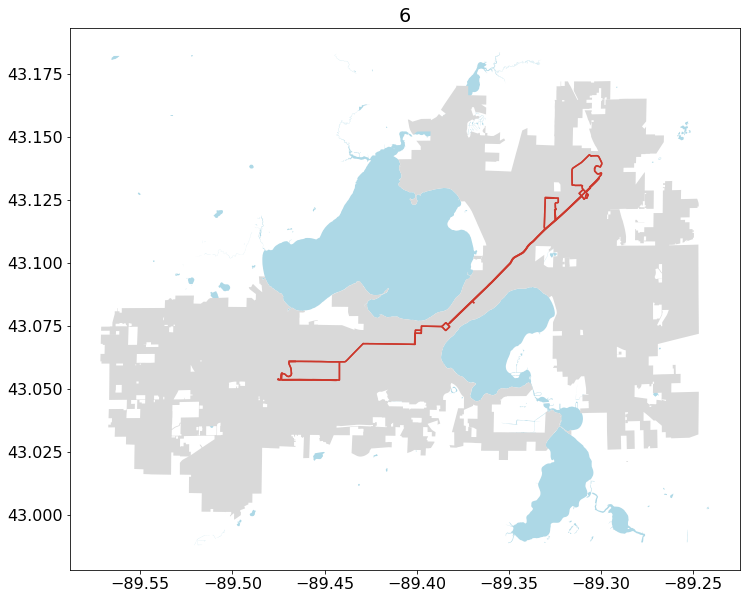

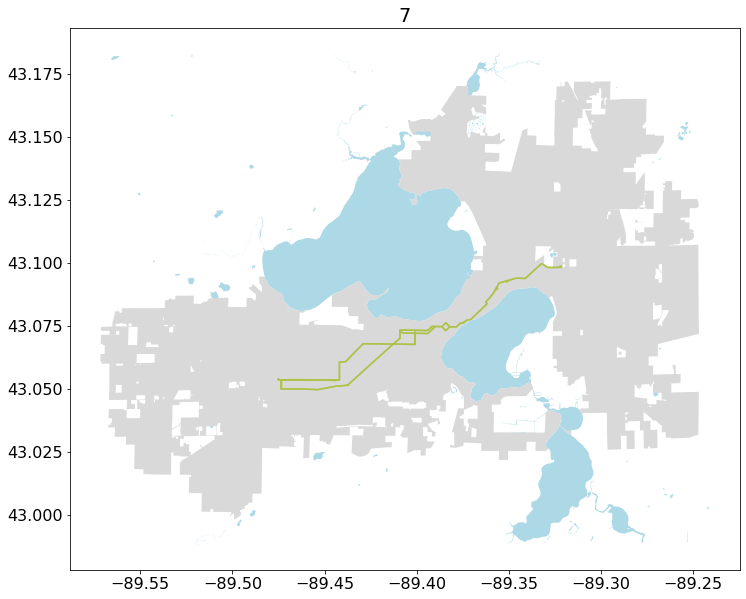

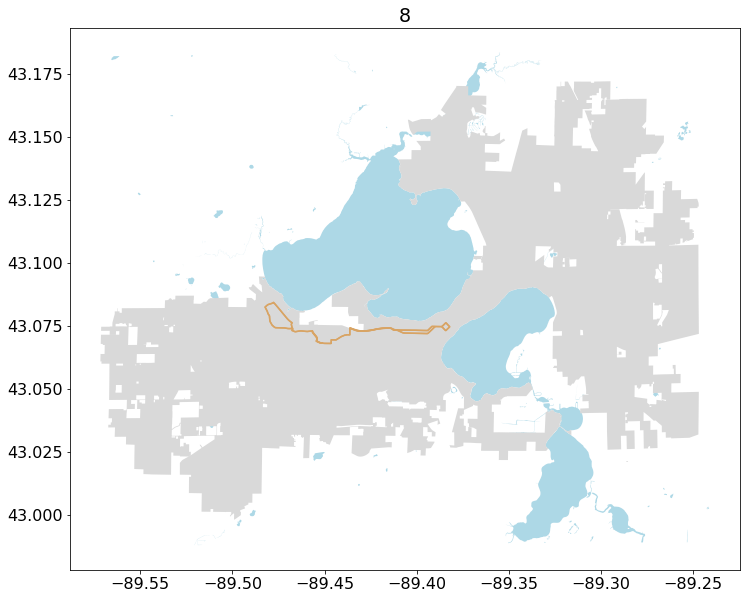

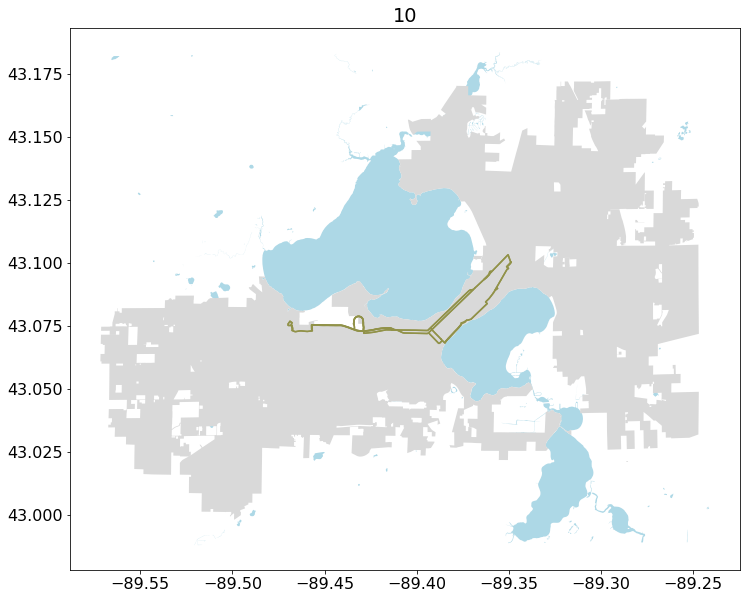

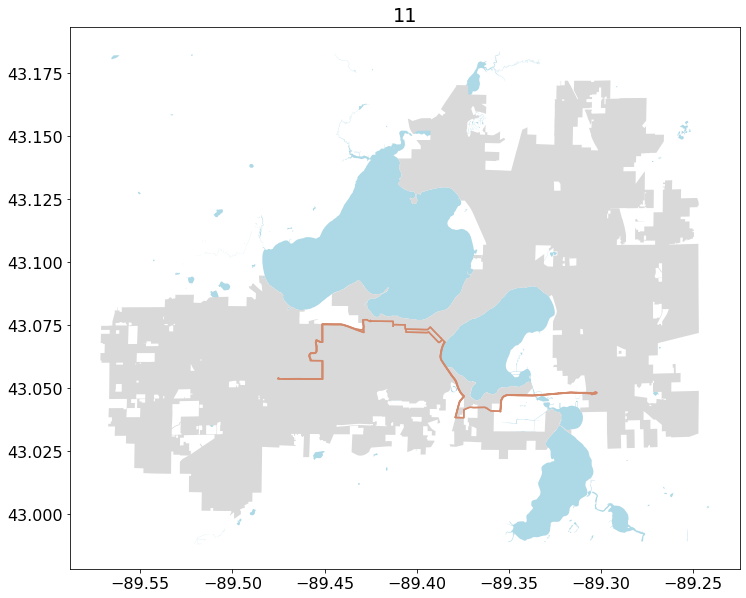

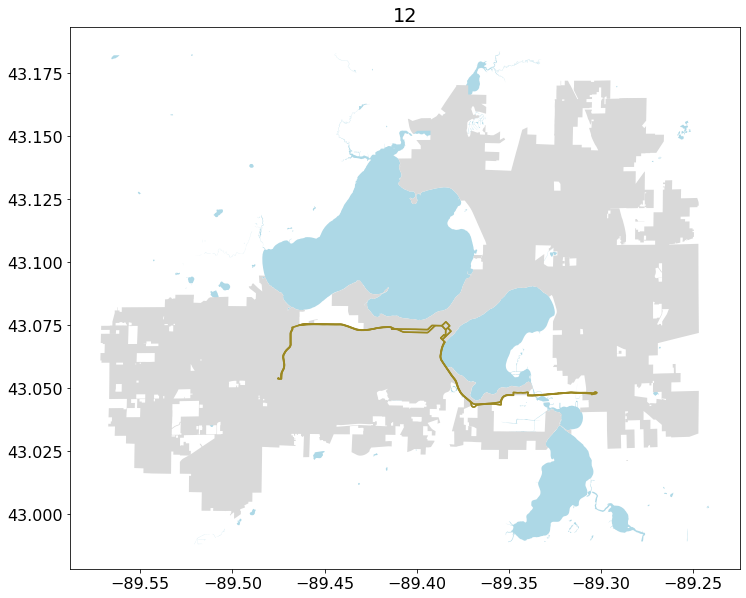

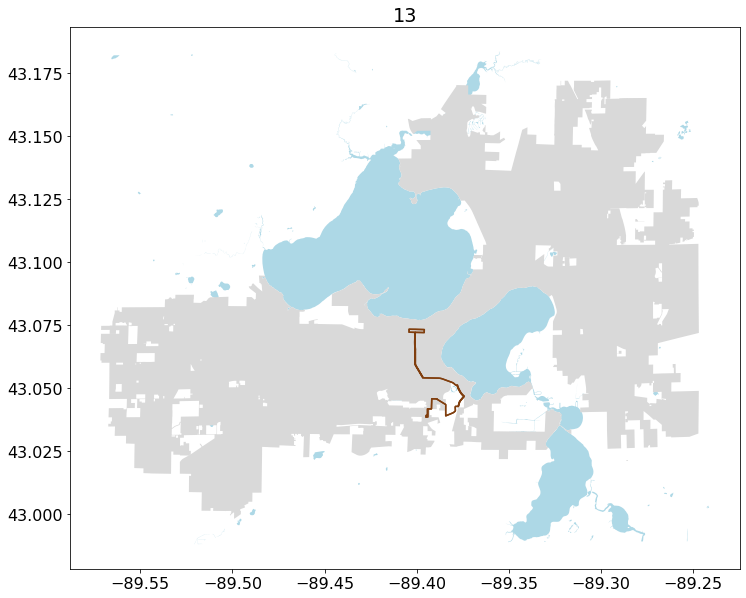

In [24]:
plt.rcParams["font.size"] = 16

for route_num in list(data.keys())[:10]:
    ax = functions.plot_background(figsize=(12,12))
    functions.plot_route(ax=ax, route_num=int(route_num))
    ax.set_title(route_num)

In [12]:
# fig, ax = plt.subplots(figsize=(12, 12))
# route2 = pd.read_csv("routes/route2.csv").sort_values(by="north_transfer (km)")
# functions.plot_background(ax)
# route2.plot.scatter(x="stop_lon", y="stop_lat", ax=ax)
# ax.margins(x=-0.25, y=-0.25)
